#DATASCI W261: Machine Learning at Scale

#Assignment: Week 6

- Juanjo Carin
- [juanjose.carin@ischool.berkeley.edu](mailto:juanjose.carin@ischol.berkeley.com)
- W261-2
- Week 06
- Submission date: 10/17/2015

#HW6.0

**In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.**

**Mathematical optimization** is the selection of a best element (with regard to some criteria) from some set of available alternatives.

I'm afraid I can't give a direct example: of course I have tried to optimize results in the past, but not applying mathematics; I'd say the objective function, in sales (and in the particular sector I worked in), could be described the profit generated, as a function of the time devoted to reach a customer, make him a presentation/demonstration, and defend the product against competitors, the revenue generated (depending on the product(s) he might end up buying), likelihoods of different outcomes (the customer doesn't buy, buys more in the future, refers us to other departments/companies, ...), the time devoted to posterior training & support, the discount level needed to close the sale, and so on. A lot of unknown variables, too few training data, and not an excess of opportunities led to a "*shoot anything that moves*" approach, in which (unfortunately) intuition rules.

Lately I've collaborated with a marketing analytics co., and though none of the projects has involved optimization (but models that rely on optimization, of course), this company does solve optimization problems such as determining the optimal distribution of advertising spend in different media (Internet, press, radio, ...) to maximize the metric chosen by the customer (sales volume, profit, calls/leads, etc.).

#HW6.1

##HW6.1.1
**For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univariate function x^3 -12x^2-6 defined over the real domain -6 to +6.**

**FOC**: Optima are found at *stationary* (aka *critical*) *points*, where the first derivative of the objective function is zero.
$$f'(x^*)=\frac{df(x^*)}{dx}=0$$

**SOC**: This condition allows distinguishing between extrema (a minimum, a maximum, or neither---e.g., a change from convexity to concavity), when the objective function is twice differentiable
$$f''(x^*)=\frac{d^2 f(x)}{dx^2} \bigg|_{x=x^*}\left\{\begin{matrix}
<0 \Rightarrow & x^* \text{is a maximum}\\ 
>0 \Rightarrow & x^* \text{is a minimum}\\ 
=0 \Rightarrow& \text{the test is inconclusive}
\end{matrix}\right.$$

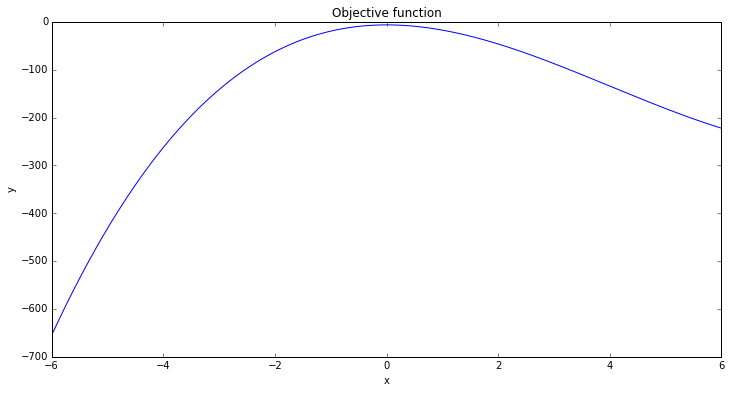

In [5]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt
## This tells matplotlib not to try opening a new window for each plot
%matplotlib inline
## Initialize a new plot
plt.figure(figsize=(12, 6))
## x spanned over our domain
x = np.linspace(-6, 6, 1000)
    ## Note that the minimum x=8 is outside this domain
## y = f(x)
y = np.power(x, 3) - 12*np.square(x) - 6

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Objective function')

## Render the plot
plt.show()

##HW6.1.2
**Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.**

$f(x)=x^3-12x^2-6$ so it's straightforward that $f'(x)=3x^2-24x=3x(x-8)$ and $f''(x)=6x-24=6(x-4)$.

If the domain were $\mathbb{R}$, the function would not be ~~convex~~ concave and the points where $f'(x)=0$, $x=0$ and $x=8$, would be the local maximum and minimum, respectively (because $f''(0)=-24<0$ and $f''(8)=24>0$); the global optima would be $-\infty$ and $+\infty$. If the domain of the function is $[-6,6]$, $x=0$, the function is ~~convex~~ concave within that domain, and $x=0$ is the global maximum.

In the graphs below it can be seen that $f(x)=x^3-12x^2-6, x \in [-6,6]$, reaches its maximum at $x=0$; at that point the first derivative is zero, and the second derivative is below the x axis (and hence $x=0$ is a maximum). The code searches for the local optima, so it could plot the local minimum at $x=8$ by just changing the following line in the previous cell:

    x = np.linspace(-6, 6, 1000)

by (for example):

    x = np.linspace(-10, 10, 1000)

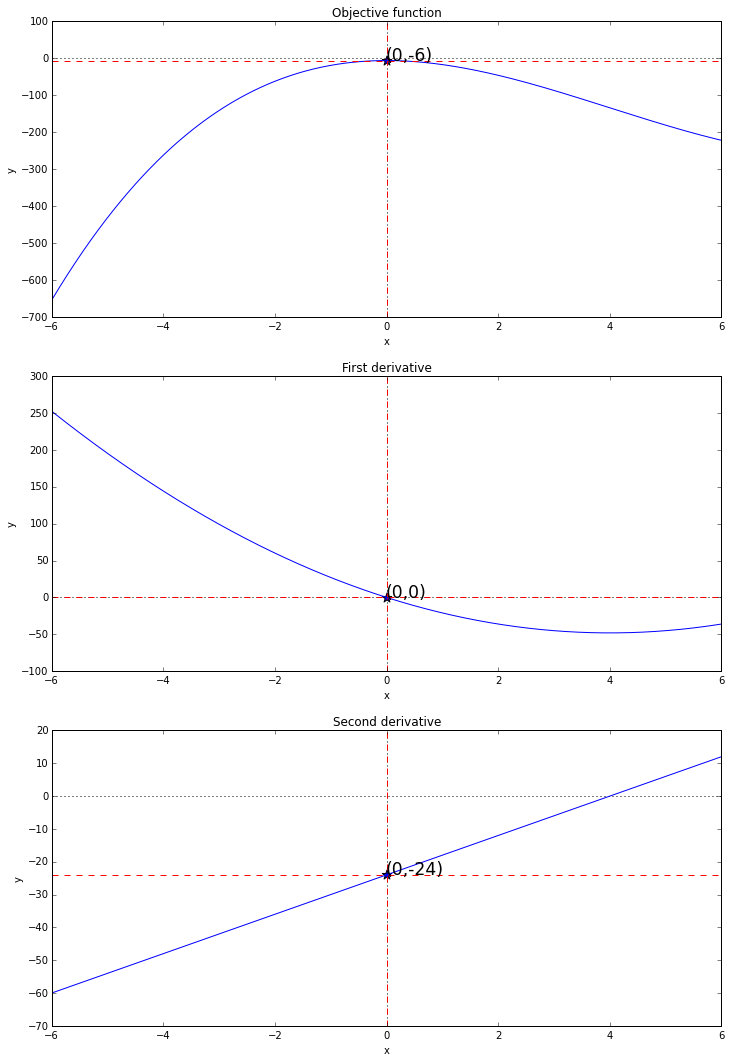

In [156]:
## Initialize a new plot
plt.figure(figsize=(12, 18))
## Let numpy calculate the derivatives
dx = np.gradient(x)
y0 = y
y1 = np.gradient(y0, dx, edge_order=2)
y2 = np.gradient(y1, dx, edge_order=2)
## Append each function
all_ys = np.row_stack((y0,y1,y2))

## Find local optima
from scipy.signal import argrelextrema
x_optima = np.append(argrelextrema(y0, np.greater), argrelextrema(y, np.less))

## Function to aply same style to the 3 graphs
def applyPlotStyle(x_optima):
    plt.xlim((np.min(x), np.max(x)))
    plt.ylabel('y')
    plt.xlabel('x')
    ## Y axis (cancelled in the case of first derivative;
        ## we're looking for f'(x)=0)
    plt.axhline(0, color='black', ls=':')
    ## X axis (cancelled by the following line since the maximum is at x=0)
    plt.axvline(0, color='black', ls=':')
    ## Vertical line in local optima
    for x_interest in x_optima:
        plt.axvline(x[x_interest], color='red', ls='dashed')

title = ['Objective function', 'First derivative', 'Second derivative']

## Plot the 3 functions
for i in range(3):
    plt.subplot(3, 1, i+1)
    ## Apply same style to all graphs
    applyPlotStyle(x_optima)
    plt.plot(x, all_ys[i,:])
    plt.title(title[i])
    ## Horizonta line (y=0) for f'(x)
    if i == 1:
        plt.axhline(0, color='red', ls='dashed')
    ## Value of y for y=f(x) and y=f''(x) at x=x*
    else:
        for x_interest in x_optima:
            plt.axhline(all_ys[i,x_interest], color='red', ls='dashed')
    ## Label (x*,f(x*)), (x*,f'(x*)), and (x*,f''(x*))
    for X, Y in zip(x[x_optima], all_ys[i,x_optima]):
        plt.scatter(X, Y, marker='*', c='blue', s=100)
        plt.annotate('({},{})'.format(int(round(X)),int(round(Y))), (X,Y), 
                     size='xx-large')
    
## Render the plots
plt.show()

##HW6.1.3
**For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?**

In the case of multivariate functions we must use the gradient and the determinant of the Hessian matrix (or **matrix of second derivatives**), instead of the first and secon derivative, respectively.

**FOC**: Optima are found at *stationary* (aka *critical*) *points*, where the gradient of the objective function is zero.
$$\nabla f(\vec{x}^*)=\left( \frac{\partial f}{\partial x_1}, ..., \frac{\partial f}{\partial x_n} \right) = \vec{0}$$

**SOC**: This condition allows distinguishing between extrema (a minimum, a maximum, or neither---e.g., a change from convexity to concavity), when the objective function is twice differentiable. It depends on the value taken by the Hessian (aka the determinant of the Hessian matrix) of the objective function:
$$\det H(f)=\left|\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\ 
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}\right|
\left\{\begin{matrix}
<0 \Rightarrow & x^* \text{is a maximum}\\ 
>0 \Rightarrow & x^* \text{is a minimum}\\ 
=0 \Rightarrow& \text{the test is inconclusive}
\end{matrix}\right.$$



#HW6.2

**Taking x=1 as the first approximation(xt1) of a root of X^3 + 2x -4 = 0, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)**

$$f(x) = x^3=2x-4 \Rightarrow f'(x)=3x^2+2$$

$$x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}$$

$$x_1 = 1 \Rightarrow x_2 = 1 - \frac{1+2-4}{3+2} = 1-\left(\frac{-1}{5}\right) = 1 - (-0.2) = 1.2$$

Below I've also implemented the method in Python: the output is not only the 2nd approximation, but the final one (with convergence condition set to $10^{-4}$).

In [30]:
import numpy as np
## Search in x_1 +/-2
x = np.linspace(-1,3,4001)
## Objective function
y0 = x ** 3 + 2* x - 4
## 1st derivative
dx = np.gradient(x)
y1 = np.gradient(y0, dx, edge_order=2)

## Define X_1
x0 = 1
## Index of that point
idx = np.abs(x - x0).argmin()
## Initialize X_t+1 - X_t
diff_x = float('inf')
## Iteration number
i=1
## Until convergence
while abs(diff_x) > 1e-8:
    ## Apply Netwon-Raphson method
    x1 = x[idx] - y0[idx]/y1[idx]
    ## Find nex index in array x
    idx = np.abs(x - x1).argmin()
    ## X_t+1 - X_t
    diff_x = x1 - x0
    print x0,x1
    if i == 1:
        print '\tAfter 1 iteration, the 2nd approximation is', x[idx]
    ## Update X_t
    x0 = x1
    ## Update number of iterations
    i += 1
    print '........'
print 'After {} iterations, the root is at {}'.format(i-1,x1)

1 1.19999996
	After 1 iteration, the 2nd approximation is 1.2
........
1.19999996 1.17974683865
........
1.17974683865 1.17950916281
........
1.17950916281 1.17950916281
........
After 4 iterations, the root is at 1.17950916281


#HW6.3

##HW6.3.1

1. **What makes an optimization problem convex?**
2. **What are the first order Necessary Conditions for Optimality in convex optimization?**
3. **What are the second order optimality conditions for convex optimization?**
4. **Are both necessary to determine the maximum or minimum of candidate optimal solutions?**

1. The fact that the objective function we're trying to minimize (of maximize) is convex, and that the domain of that function is a (closed) convex set.

2. If $x$ is an optimal point (in convex optimization, it will be a global optima), then $\nabla f(x)=0$.

3. If $x$ is an optimal point (in convex optimization, it will be a global optima), then the Hessian is positive semi-definite.

4. Yes, they are. There also sufficient conditions: the Hessian is positive definite.

##HW6.3.2

**Fill in the BLANKS here:**

Convex minimization, a subfield of optimization, studies the problem of minimizing **convex** functions over **convex** sets. The **convexity** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

#HW6.4

**The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:**

**0.5\* sumOverTrainingExample i (weight_i * (W * X_i - y_i)^2)**

**Where training set consists of input variables X (in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.**

**Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.**

Supposed the vector of coefficients is $beta$ (rather than $W$), and we have n observartions of the dependent variable $y$ and the input variables $X$, each of these observations will have a weight $\omega_i$:

$$J_{WOLS}(\beta) = \frac{1}{2} \sum_{i=1}^n \omega_i \left(\beta X_i - y_i\right )^2$$

So $y_i$ and $\omega_i$ are escalars, and (assuming $p$ input variables, $X_i$ and $\beta$ are both vectors of $\mathbb{R}^{p+1}$.

To calculate the gradient of the learning objective function we'll make use of the following properties:

1. $\frac{d}{dx}(f(x)+g(x))=\frac{df(x)}{dx}+\frac{dg(x)}{dx}$
2. $\frac{d}{dx}(k \cdot f(x)) = k \frac{df(x)}{dx}$
3. $\frac{d}{dx}(f(x))^n=n (f(x))^{n-1} \frac{df(x)}{dx}$

keeping in mind that $\omega_i, X_i, y_i$ are constants with respect to $\beta$:

$$\frac{\partial J}{\partial \beta} = \frac{\partial}{\partial \beta}\left(\frac{1}{2} \sum_{i=1}^n \omega_i \left(\beta X_i - y_i\right )^2\right) = \frac{1}{2}\frac{\partial}{\partial \beta} \left( \sum_{i=1}^n \omega_i \left(\beta X_i - y_i\right )^2 \right ) = \frac{1}{2}\sum_{i=1}^n \frac{\partial}{\partial \beta} \left( \omega_i \left(\beta X_i - y_i\right )^2\right ) = $$

$$=\frac{1}{2} \sum_{i=1}^n\omega_i\frac{\partial}{\partial \beta}\left(  \beta X_i - y_i \right )^2 = \frac{1}{2}\sum_{i=1}^n\omega_i \cdot 2 (\beta X_i - y_i)\frac{\partial}{\partial \beta}\left( \beta X_i - y_i\right)=\sum_{i=1}^n\omega_iX_i\left(\beta X_i-y_i\right)$$

Using **matrices** ($Y \in \mathbb{R}^{n \times 1}$, $\beta \in \mathbb{R}^{(p+1) \times 1}$, $X \in \mathbb{R}^{n \times (p+1)}$, and $W$ is a diagonal matrix in $\mathbb{R}^{n \times n}$):

$$J_{WOLS}(\beta) = \frac{1}{2} \left( X \beta - Y \right)^T W \left( X \beta - Y \right)$$

$$\frac{\partial J}{\partial \beta} = \frac{\partial}{\partial \beta} \left( \frac{1}{2} \left( X \beta - Y \right)^T W \left( X \beta - Y \right)\right) = \frac{1}{2}\frac{\partial}{\partial \beta}\left(\beta^T X^T -Y^T \right)W\left(X\beta-Y\right)=$$

$$=\frac{1}{2}\frac{\partial}{\partial \beta}\left( \beta^TX^TWX\beta-2\beta^TX^TWY+Y^TWY \right) = \frac{1}{2}\frac{\partial}{\partial \beta}\left(2X^TWX\beta - 2X^TWY+0\right)=$$

$$=X^TW\left(X\beta-Y\right)$$


#HW6.5

**Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.**

**Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb**

**Weight each example as follows: weight(x)= abs(1/x)**

**Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**

**Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.**

As seen in HW6.4:

$$\frac{\partial J}{\partial \beta} = \sum_{i=1}^n\omega_iX_i\left(\beta X_i-y_i\right) = \sum_{i=1}^n \omega_i
\begin{pmatrix}
1\\ 
x_i 
\end{pmatrix}
\left( 
\bigl(\begin{smallmatrix}
1 & x_i
\end{smallmatrix}\bigr)
\begin{pmatrix}
\beta_0^{t}\\ 
\beta_1^{t}
\end{pmatrix} -y_i
\right )=$$

$$=\sum_{i=1}^n 
\begin{pmatrix}
\omega_i\\ 
\omega_i x_i
\end{pmatrix}
\left(\beta_0^{t}+\beta_1^t x_i-y_i \right )=\sum_{i=1}^n 
\begin{pmatrix}
\omega_i\\ 
\omega_i x_i
\end{pmatrix}
\left(\hat{y_i}-y_i \right )$$

In OLS $\omega_i=1$. In WLS it's typical to use $\omega_i=\frac{1}{\sigma_i}$, where $\sigma_i$ is the variance of $y_i$, but here we'll use $\omega_i=\frac{1}{|x_i|}$, so:

$$\frac{\partial J}{\partial \beta}=\sum_{i=1}^n 
\begin{pmatrix}
1/|x_i|\\ 
sign(x_i)
\end{pmatrix}
\left(\hat{y_i}-y_i \right )$$

The mappers emit the individual elements of this summations, the reducer sums them all, and the driver performs the Gradient Descent method, i.e.:

$$\begin{pmatrix}
\beta_0^{t+1}\\ 
\beta_1^{t+1}
\end{pmatrix} = 
\begin{pmatrix}
\beta_0^{t}\\ 
\beta_1^{t}
\end{pmatrix} - \eta \frac{\partial J}{\partial \beta} = 
\begin{pmatrix}
\beta_0^{t}\\ 
\beta_1^{t}
\end{pmatrix} - \eta \sum_{i=1}^n 
\begin{pmatrix}
(\hat{y_i}-y_i)/|x_i|\\ 
sign(x_i)(\hat{y_i}-y_i)
\end{pmatrix}$$

And repeates the process until convergence.

I've adapted the code from the notebook mentioned above. Apart from:

- including the weights,
- referring to the $\beta$'s as coefficients, to avoid confusion), and
- changin the sign of `D[0]` and `y_hat` to use the same definition given in HW6.4 (and also to subtract the gradient times the learning rate to the previous coefficients, instead of adding it).

there is one **important change**:

That notebook uses the MSE as cost function, i.e., the summation  is divided by $n$, the number of elements in the sample (actually, half this value ---which is very typical-- so the number $2$ does not appear in the gradient of the cost function). I have not considered the number of elements (and hence the variables `partial_count` and `total_count` do not appear in my code) because that factor is not important in the Gradient Descent method: same as the cost function is usually defined as $J(\beta)=MSE/2$, we can also use $n \cdot MSE /2$: any factor is irrelevant because we are not interested in the value of the cost function, but in the vector $\beta^*$ in which that function reaches its minimum (and since $(k \cdot f(x))' = k\cdot f'(x)$, if $f'(x^*)=0$ then $(k \cdot f(x^*))'=0$, too, and the minimum of both functions will be at the same point (though each function will have a different value at that point).

This reduces the traffic from the mappers to the reducer. On the other hand, we will have to reduce the learning rate accordingly.

###Generate data (and 1% sample)

In [39]:
import numpy as np
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x)
np.savetxt('/HD/tmp/WLS.csv',data,delimiter = ",")

sample_idx = np.random.choice(size, size*0.01, replace=False)
x_sample = x[sample_idx]
y_sample = y[sample_idx]
data_sample = zip(y[sample_idx],x_sample)
np.savetxt('/HD/tmp/WLS_sample.csv',data_sample,delimiter = ",")

###MRJob

In [40]:
%%writefile MrJobBatchGDUpdate_WLS.py
from mrjob.job import MRJob
from mrjob.job import MRStep
from math import copysign

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MrJobBatchGDUpdate_WLS(MRJob):
    # run before the mapper processes any input
    def read_coefficientsfile(self):
        # Read coefficients file
        with open('/HD/tmp/coefficients.txt', 'r') as f:
            self.coefficients = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.coefficients)
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        D = (map(float,line.split(',')))
        # y_hat is the predicted value given current weights
        y_hat = self.coefficients[0]+self.coefficients[1]*D[1]
        # Update parial gradient vector with gradient form current example
        self.partial_Gradient = [self.partial_Gradient[0]+(y_hat-D[0])/
                                     abs(D[1]), 
                                 self.partial_Gradient[1]+(y_hat-D[0])*
                                     copysign(1,D[1])]
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, self.partial_Gradient
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulator(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        for partial_Gradient in partial_Gradient_Record:
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
        yield None, [v for v in total_gradient]

    def steps(self):
        return [MRStep(mapper_init = self.read_coefficientsfile, 
                       mapper = self.partial_gradient, 
                       mapper_final = self.partial_gradient_emit,
                       reducer = self.gradient_accumulator)]
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_WLS.run()

Overwriting MrJobBatchGDUpdate_WLS.py


###Driver

As mentioned, here's where Gradient Descent is implemented. The election of the learning rate is critical: there is a trade-off between convergence & speed. Besides, $J(\beta)$ might even grow instead of decreasing if the learning rate is too high.

With the value I chose, the number of iterations was below 70.

In [41]:
import numpy as np
from MrJobBatchGDUpdate_WLS import MrJobBatchGDUpdate_WLS

learning_rate = 1e-7
stop_criteria = 1e-6

# Generate random values as inital coefficients
coefficients = np.array([np.random.uniform(-3,3), np.random.uniform(-3,3)])
# Write the coefficients to the files
with open('/HD/tmp/coefficients.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in coefficients))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_WLS(args=['/HD/tmp/WLS.csv'])
# Repeat until convergence
i = 0
coefficients_prev = [float('inf')]*2
while sum((coefficients-coefficients_prev)**2) > stop_criteria:
    if i%10 == 0:
        print "iteration ="+str(i)+"  coefficients =", coefficients
    # Save coefficients from previous iteration
    coefficients_prev = coefficients
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            coefficients = coefficients - learning_rate*np.array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('/HD/tmp/coefficients.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in coefficients))
        
print "Final coefficients\n"
print coefficients

iteration =0  coefficients = [-0.38033732  0.44036501]
iteration =10  coefficients = [-2.73744757  0.94013422]
iteration =20  coefficients = [-3.55967909  0.99376262]
iteration =30  coefficients = [-3.84641191  0.99951564]
iteration =40  coefficients = [-3.94639358  1.00013223]
iteration =50  coefficients = [-3.98125547  1.00019811]
Final coefficients

[-3.99099203  1.00020429]


###Train a weighted linear regression model locally

It seems WLS is [not implemented yet in SKLearn](https://github.com/scikit-learn/scikit-learn/issues/4735). So I tried both alternatives mentioned in Google Groups: numpy's polyfit did not yield a good approximation (perhaps I didn't use it correctly, though it seems straightforward), but statsmodels' WLS

In [42]:
## Polyfit
from numpy.polynomial import polynomial as P
weights_polyfit = np.abs(1/x_sample)
weights_polyfit = 1 / np.absolute(x_sample)
c = P.polyfit(x_sample, y_sample, 1, w=weights_polyfit)
print c

z = np.polyfit(x_sample, y_sample, 1, w=weights_polyfit)
print z

## Statsmodels
import statsmodels.api as sm
weights_statsmodels = 1 / np.absolute(x_sample)
X = sm.add_constant(x_sample)
mod_wls = sm.WLS(y_sample, X, w=weights_statsmodels)
res_wls = mod_wls.fit()
#print res_wls.summary()
print res_wls.params

[-3.91870534  0.9525352 ]
[ 0.9525352  -3.91870534]
[-3.99905638  0.99964624]


###Plot results

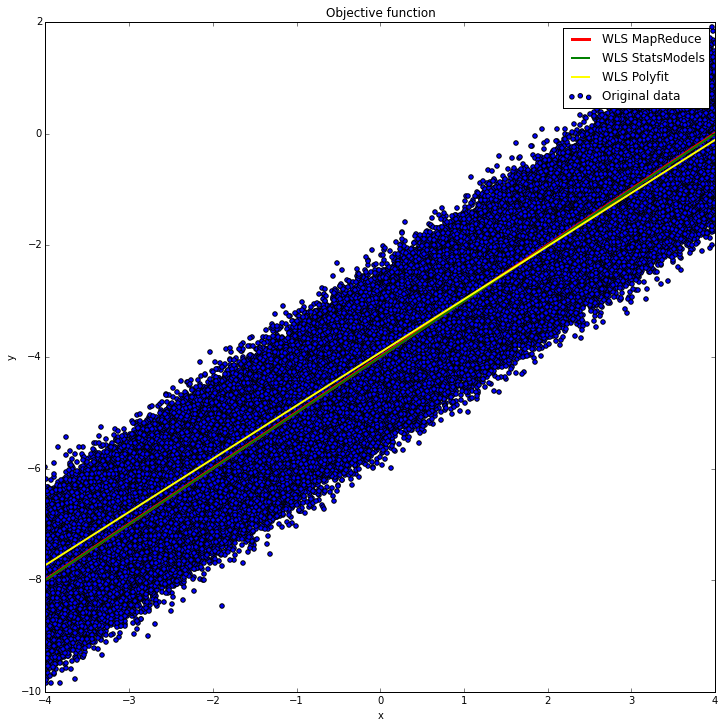

In [43]:
plt.figure(figsize=(12, 12))

plt.scatter(x, y, label='Original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Objective function')
plt.xlim((-4, 4))
plt.ylim((-10,2))

x_line = np.linspace(-4,4,1000)
x_line = np.vstack((np.ones(1000),x_line))
y_line = np.dot(coefficients,x_line)
plt.plot(x_line[1,:], y_line, color='red', lw=3, label='WLS MapReduce')
y_line2 = np.dot(res_wls.params,x_line)

plt.plot(x_line[1,:], y_line2, color='green', lw=2, label='WLS StatsModels')
y_line3 = np.dot(c,x_line)

plt.plot(x_line[1,:], y_line3, color='yellow', lw=2, label='WLS Polyfit')
plt.legend(loc="best")

plt.show()

The weighted regression model using Gradient Descent in a MapReduce framework (with all the data) is almost indistinguishable from the model using Statsmodels (the model using Polyfit is slightly different, maybe because it's not an appropriate function for WLS). Both describe almost perfectly the original data, that satisfies $E[Y|x]=x-4$.